In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from fastai.structured import *
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
df = pd.read_csv('data/hour.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#df['cnt'] = np.log1p(df['cnt'])

In [6]:
train_df = df.loc[df['dteday'] < '2012-07-01']
valid_df = df.loc[df['dteday'] > '2012-07-01']

In [7]:
X_train, y_train, nas = proc_df(train_df, 'cnt', skip_flds=['instant', 'dteday', 'casual', 'registered'])
X_valid, y_valid, _ = proc_df(valid_df, 'cnt', skip_flds=['instant', 'dteday', 'casual', 'registered'])

In [8]:
X_train.shape, X_valid.shape

((13003, 12), (4352, 12))

In [11]:
def rmsle(pred, targ):
    return np.sqrt(((np.log1p(pred) - np.log1p(targ)) ** 2).mean())

def print_score(m):
    res = [rmsle(m.predict(X_train), y_train), rmsle(m.predict(X_valid), y_valid), 
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [13]:
model = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False)
model.fit(X_train, y_train)
print_score(model)

[0.7983976809584434, 0.7299522035425197, 0.49136305225068927, 0.40793170460292566]


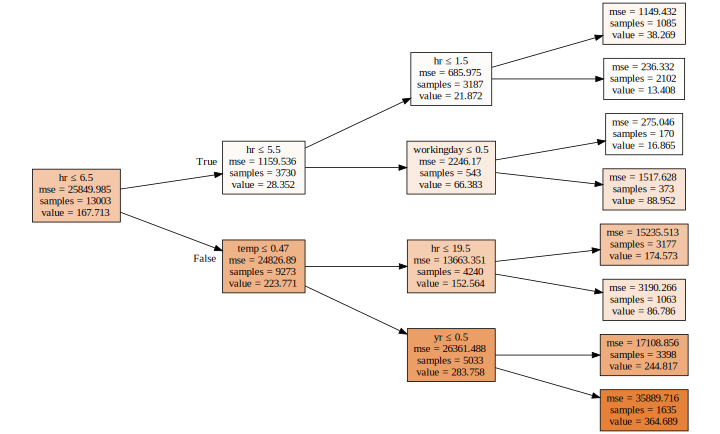

In [14]:
draw_tree(model.estimators_[0], X_train, precision=3)

In [15]:
model = RandomForestRegressor(n_estimators=1, bootstrap=False)
model.fit(X_train, y_train)
print_score(model)

[0.008443012854785078, 0.4930636558530992, 0.9999890547438914, 0.8459211358925824]


In [24]:
model = RandomForestRegressor(n_estimators=10)
model.fit(X_train, y_train)
print_score(model)

[0.17646034409852365, 0.39748108400251925, 0.9889539960228737, 0.8900380998681449]


In [25]:
preds = np.stack([t.predict(X_valid) for t in model.estimators_])

In [26]:
preds.shape

(10, 4352)

In [27]:
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)
matplotlib.rcParams.update({'font.size': 15})

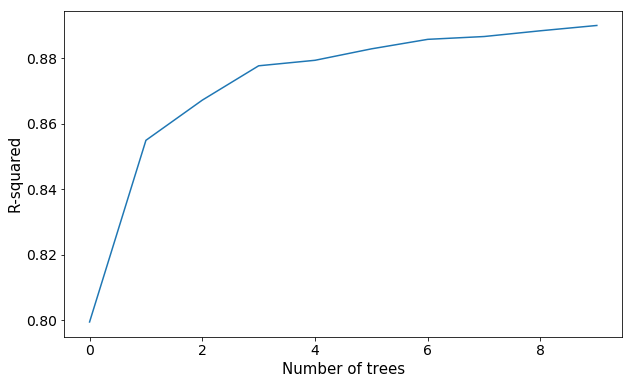

In [28]:
plt.figure(figsize=(10, 6))
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)])
plt.xlabel('Number of trees')
plt.ylabel('R-squared');